In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
from bs4 import BeautifulSoup
import emoji
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize

In [2]:
# Excel file is named 'iphone_data.xlsx'
data = pd.read_excel('Smartphone_data.xlsx')

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

data.tail(20)

Brand         Product  \
23398  Sony  Sony Xperia 5V   
23399  Sony  Sony Xperia 5V   
23400  Sony  Sony Xperia 5V   
23401  Sony  Sony Xperia 5V   
23402  Sony  Sony Xperia 5V   
23403  Sony  Sony Xperia 5V   
23404  Sony  Sony Xperia 5V   
23405  Sony  Sony Xperia 5V   
23406  Sony  Sony Xperia 5V   
23407  Sony  Sony Xperia 5V   
23408  Sony  Sony Xperia 5V   
23409  Sony  Sony Xperia 5V   
23410  Sony  Sony Xperia 5V   
23411  Sony  Sony Xperia 5V   
23412  Sony  Sony Xperia 5V   
23413  Sony  Sony Xperia 5V   
23414  Sony  Sony Xperia 5V   
23415  Sony  Sony Xperia 5V   
23416  Sony  Sony Xperia 5V   
23417  Sony  Sony Xperia 5V   

                                                                                                                                                                                                                                                                                                                                                                                          Comment Text  \
23398                                                                                                                                                                                                                                                                                                                                                   You better use a Sony Camera ... it will zoom.   
23399  You are lying. I bought this phone looking at the videos like that and that is NOT what you get. 10% of videos are gone because there is some random error. About 30% of videos have random freezes in the video. Then 20% of the videos have audio and video out of sync. Then 5% of videos get blackness when you zoom in or out. Complete shit product, buy something else, anything really!   
23400                                                                                                                                                                                                                                                                                                                                                                  Which STAR WARS series is that?   
23401                                                                                                                                                                                                                                                                                                                                                                            no telephoto lens meh   
23402                                                                                                                                                                       I've owned many Xperia phones and I am watching this with My Xperia V. They all overheat, slowdown and camera shuts down prematurely. I think I'm going Pixel 8 pro this time. Thanks for the awesome reviews, I'm a fan 😊   
23403                                                                                                                                                                                                                                                                                                                                                                    the side bezels lmao so thicc   
23404                                                                                                                                                                                                                                                                                                                                                                 you can get a 256gb one of these   
23405                                                                                                                                                                                                     

# Data PreProcessing

In [3]:
## Display the total number of records in the dataframe
len(data)

23418

In [4]:
# present the summary statistics of the dataset 
print(data.describe)

<bound method NDFrame.describe of         Brand         Product  \
0      iphone       iphone 15   
1      iphone       iphone 15   
2      iphone       iphone 15   
3      iphone       iphone 15   
4      iphone       iphone 15   
...       ...             ...   
23413    Sony  Sony Xperia 5V   
23414    Sony  Sony Xperia 5V   
23415    Sony  Sony Xperia 5V   
23416    Sony  Sony Xperia 5V   
23417    Sony  Sony Xperia 5V   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [5]:
# display data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23418 entries, 0 to 23417
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              23418 non-null  object
 1   Product            23418 non-null  object
 2   Comment Text       23415 non-null  object
 3   Username           23418 non-null  object
 4   Timestamp          23418 non-null  object
 5   Likes              23418 non-null  int64 
 6   Dislikes           23418 non-null  int64 
 7   User Engagement    23418 non-null  int64 
 8   Video Title        23418 non-null  object
 9   Video URL          23418 non-null  object
 10  Video Description  23418 non-null  object
 11  Comment ID         23418 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.1+ MB
None


In [6]:
print(data.dtypes)

Brand                object
Product              object
Comment Text         object
Username             object
Timestamp            object
Likes                 int64
Dislikes              int64
User Engagement       int64
Video Title          object
Video URL            object
Video Description    object
Comment ID            int64
dtype: object


In [7]:
#No of missing values in each column
data.isnull().sum()

Brand                0
Product              0
Comment Text         3
Username             0
Timestamp            0
Likes                0
Dislikes             0
User Engagement      0
Video Title          0
Video URL            0
Video Description    0
Comment ID           0
dtype: int64

In [8]:
# Fill missing values in 'Comment Text' column with 'No comments'
data['Comment Text'].fillna('No comments', inplace=True)

#No of missing values in each column
data.isnull().sum()


Brand                0
Product              0
Comment Text         0
Username             0
Timestamp            0
Likes                0
Dislikes             0
User Engagement      0
Video Title          0
Video URL            0
Video Description    0
Comment ID           0
dtype: int64

## Clean & Normalizing Text

In [9]:
import re
import emoji
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to clean and normalize text
def clean_text(text):
    # Remove special characters, emojis, and unnecessary symbols
    text = re.sub(r'[^\w\s]', '', str(text))
    # Remove emojis
    text = emoji.demojize(text)
    # Eliminate URLs or hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Normalize text (convert to lowercase)
    text = text.lower()
    return text

# Function to clean and standardize usernames
def clean_username(username):
    # Remove special characters and leading/trailing spaces
    username = re.sub(r'[^\w\s]', '', str(username))
    # Standardize username (convert to lowercase)
    username = username.lower().strip()
    return username

# Function to process timestamp column
def process_timestamp(df):
    if 'Timestamp' in df.columns:
        # Convert 'Timestamp' column to datetime format
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        # Extract date from the 'Timestamp' column
        df['Date'] = df['Timestamp'].dt.date
        # Extract time from the 'Timestamp' column
        df['Time'] = df['Timestamp'].dt.time
        # Combine 'Date' and 'Time' into a single 'Timestamp' column
        df['Timestamp'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        # Drop the 'Date' and 'Time' columns
        df = df.drop(columns=['Date', 'Time'])
    return df

# Function to clean and extract relevant information from video description
def clean_and_extract_description(description):
    # Remove HTML tags
    description = BeautifulSoup(description, 'html.parser').get_text()
    # Remove unwanted formatting
    description = re.sub(r'\n', ' ', description)
    # Remove emojis
    description = emoji.demojize(description)
    # Eliminate URLs or hyperlinks
    description = re.sub(r'http\S+', '', description)
    # Normalize text (convert to lowercase)
    description = description.lower()
    return description

# Function to handle missing values in 'Comment Text' column
def handle_missing_comments(df):
    if 'Comment Text' in df.columns:
        # Fill missing values in 'Comment Text' column with 'No comments'
        df['Comment Text'].fillna('No comments', inplace=True)
    return df

# Function to clean, tokenize, and lemmatize text
def clean_text_with_lemmatization(text):
    # Remove special characters, emojis, and unnecessary symbols
    text = re.sub(r'[^\w\s]', '', str(text))
    # Remove emojis
    text = emoji.demojize(text)
    # Eliminate URLs or hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Normalize text (convert to lowercase)
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into text
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text

# Read the data from the Excel file
data = pd.read_excel('Smartphone_data.xlsx')

# Apply data processing functions to the DataFrame
data['Comment Text'] = data['Comment Text'].apply(clean_text_with_lemmatization)
data['Username'] = data['Username'].apply(clean_username)
data = process_timestamp(data)
data['Video Description'] = data['Video Description'].apply(clean_and_extract_description)
data = handle_missing_comments(data)
if 'Comment ID' in data.columns:
    data.drop(columns=['Comment ID'], inplace=True)

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

# Display the first 20 rows of the DataFrame
print(data.head(20))

C:\Users\atiya\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


     Brand    Product  \
0   iphone  iphone 15   
1   iphone  iphone 15   
2   iphone  iphone 15   
3   iphone  iphone 15   
4   iphone  iphone 15   
5   iphone  iphone 15   
6   iphone  iphone 15   
7   iphone  iphone 15   
8   iphone  iphone 15   
9   iphone  iphone 15   
10  iphone  iphone 15   
11  iphone  iphone 15   
12  iphone  iphone 15   
13  iphone  iphone 15   
14  iphone  iphone 15   
15  iphone  iphone 15   
16  iphone  iphone 15   
17  iphone  iphone 15   
18  iphone  iphone 15   
19  iphone  iphone 15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [10]:
print(data['Comment Text'])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         would you rather have a 14 pro or a 15 for that iphone 15 battery test
1        a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a 

## Keyword Extraction

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords
nltk.download('stopwords')
 

# Tokenization and removal of stopwords
stop_words = set(stopwords.words('english'))
tokenizer = nltk.RegexpTokenizer(r'\w+')

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply text preprocessing to the 'Comment Text' column
data['Processed Comment'] = data['Comment Text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidata_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust max_features as needed
tfidata_matrix = tfidata_vectorizer.fit_transform(data['Processed Comment'])

# Get the feature names (words) from the TF-IDF model
feature_names = tfidata_vectorizer.get_feature_names_out()

# Find the top keywords based on their TF-IDF scores
top_keywords = []

for i, row in enumerate(tfidata_matrix):
    row = row.toarray().flatten()
    top_indices = row.argsort()[-5:][::-1]  # Get the indices of top 5 TF-IDF scores
    keywords = [feature_names[idx] for idx in top_indices]
    top_keywords.append(keywords)

# Add the top keywords to the DataFrame
data['Top Keywords'] = top_keywords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction

In [12]:
import pandas as pd
import re

# Predefined list of smartphone-related terms
smartphone_terms = [
    "camera", "battery", "performance", "screen", "display", "design", "price",
    "storage", "processor", "ram", "camera quality", "waterproof", "fast charging",
    "operating system", "UI", "user interface", "updates", "security", "privacy",
    "biometric", "fingerprint", "facial recognition", "voice assistant", "wireless charging"
    # Add more terms as needed
]

# Define a function to extract smartphone features from text
def extract_smartphone_features(text):
    features = []
    # Iterate through each predefined smartphone term
    for term in smartphone_terms:
        # Search for the term in the text (case insensitive and whole word match)
        if re.search(r'\b{}\b'.format(term), text, re.IGNORECASE):
            features.append(term)
    return features

# Apply the function to the preprocessed Comment Text and Video Description columns
data['Top Smartphone Features'] = data['Comment Text'].apply(extract_smartphone_features) + \
                                   data['Video Description'].apply(extract_smartphone_features)

# If you want to remove duplicates and convert the list to a set
data['Top Smartphone Features'] = data['Top Smartphone Features'].apply(lambda x: list(set(x)))


In [13]:
unique_features = data['Top Smartphone Features'].dropna().explode().unique()
print(unique_features)

['battery' 'camera' 'processor' 'design' 'screen' nan 'price' 'display'
 'performance' 'ram' 'security' 'fingerprint' 'operating system'
 'wireless charging' 'fast charging' 'storage' 'facial recognition'
 'camera quality' 'waterproof' 'UI' 'updates' 'biometric' 'user interface'
 'privacy' 'voice assistant']


## Positive and Negative Sentences Extraction

In [14]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import emoji

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to extract positive and negative sentences
def extract_positive_negative_sentences(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', str(text))
    positive_sentences = []
    negative_sentences = []
    for sentence in sentences:
        score = sid.polarity_scores(sentence)
        if score['compound'] > 0.05:  # Adjust the threshold as needed
            positive_sentences.append(sentence)
        elif score['compound'] < -0.05:  # Adjust the threshold as needed
            negative_sentences.append(sentence)
    return positive_sentences, negative_sentences

# Apply the extract_positive_negative_sentences function to the 'Comment Text' column
data[['Positive Sentences CT', 'Negative Sentences CT']] = data['Comment Text'].apply(
    lambda x: pd.Series(extract_positive_negative_sentences(x)))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Save cleaned data to a new Excel file
data.to_excel('cleaned_smartphone_data.xlsx', index=False)


data_new = pd.read_excel('cleaned_smartphone_data.xlsx')

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

In [16]:
data_new.head(30)

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT
0,iphone,iphone 15,would you rather have a 14 pro or a 15 for that iphone 15 battery test,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[]
1,iphone,iphone 15,a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something thing farther away get smaller slower rate thing closer background object look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'thing', 'position']","['processor', 'camera']",['a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away'],[]
2,iphone,iphone 15,hey chap is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade to the iphone 15 or 15 plus - and how much better are the 15 pro's? here's everything you n

# EDA

## Likes by Brand

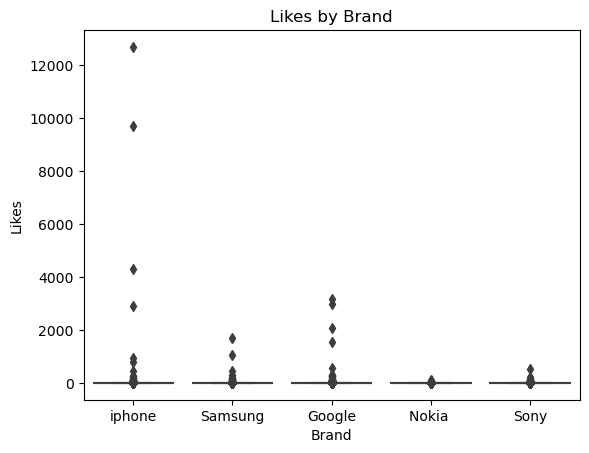

In [17]:
#Likes by Brand 
sns.boxplot(x='Brand', y='Likes', data=data_new) #creates a boxplot showing likes distribution by brand
plt.title('Likes by Brand') # set the title of the plot
plt.xlabel('Brand') # set the label for the x-axis 
plt.ylabel('Likes') # set the label for the y-axis
plt.show() #display the plot 

## Count of Comments by Brand

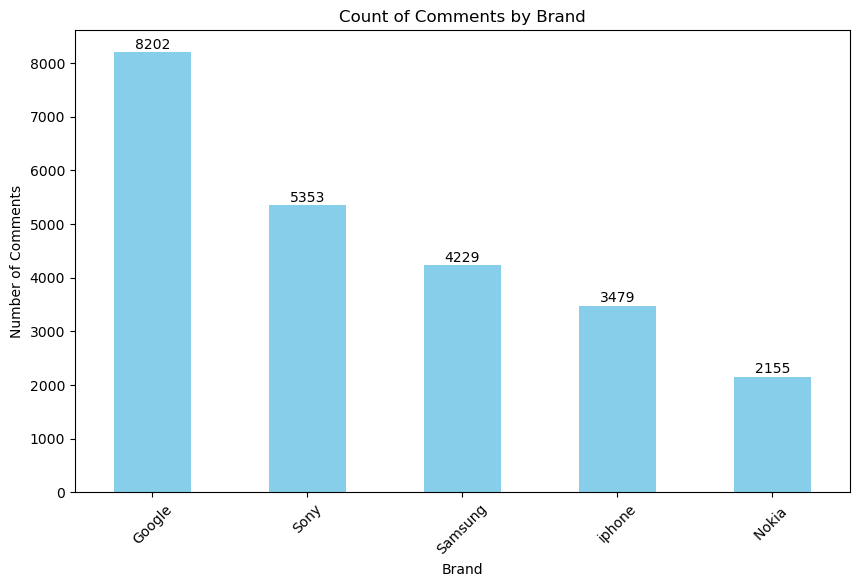

In [18]:
# Count of Comments by Brand
brand_counts = data_new['Brand'].value_counts()  # Count the number of comments for each brand
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
brand_counts.plot(kind='bar', color='skyblue')  # Create a bar plot for the count of comments by brand
plt.title('Count of Comments by Brand')  # Set the title of the plot
plt.xlabel('Brand')  # Set the label for the x-axis
plt.ylabel('Number of Comments')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to the bars
for i, count in enumerate(brand_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()  # Display the plot


## Count of comments by Product

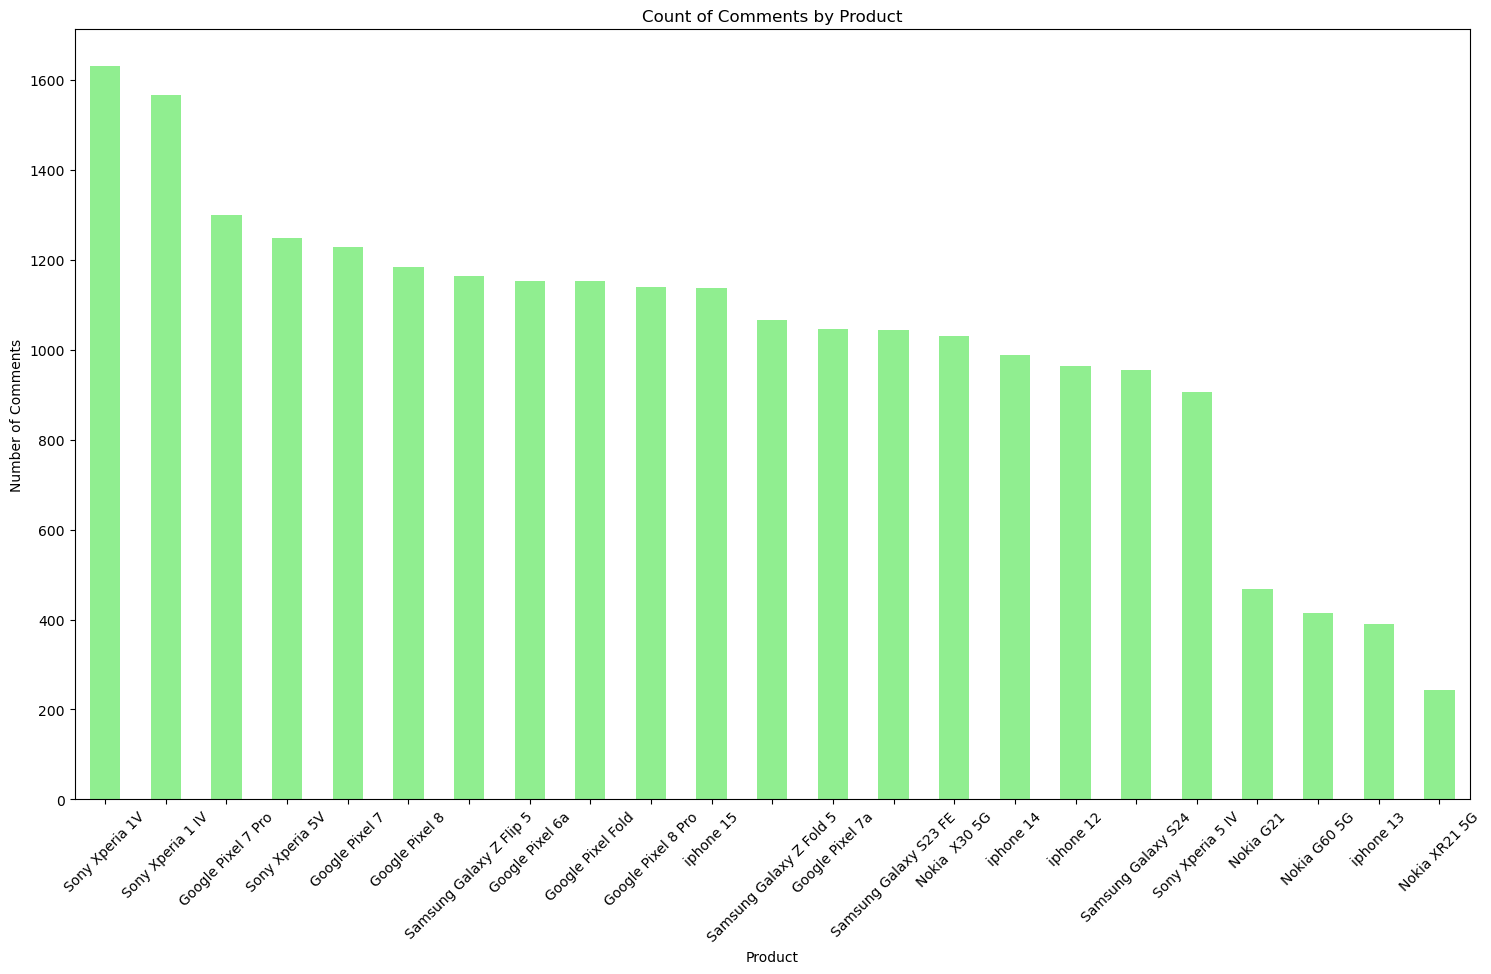

In [19]:
# Count of Comments by Product
product_counts = data_new['Product'].value_counts() #Count the number of comments for each product 
plt.figure(figsize=(18, 10)) # Set the figure size for the plot 
product_counts.plot(kind='bar', color='lightgreen') # Create a barplot for the count of comments by prodcut 
plt.title('Count of Comments by Product') # Set the title of the plot 
plt.xlabel('Product') #Set the label for the x-axis
plt.ylabel('Number of Comments') # Set the label for the y-axis 
plt.xticks(rotation=45) # Rotate x-axis labels for better readability 
plt.show() #Display the plot 

## Engagement Metrics Comaprission by Brand

<Figure size 1000x600 with 0 Axes>

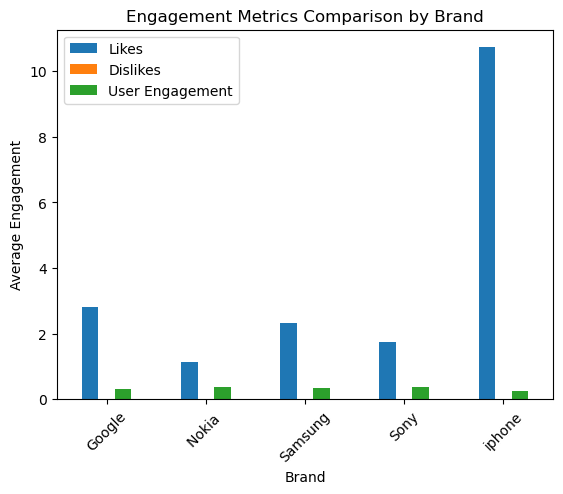

In [20]:
# Engagement Metrics Comparison
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
# Group by brand and calculate the mean of engagement metrics, then create a bar plot
data_new.groupby('Brand')[['Likes', 'Dislikes', 'User Engagement']].mean().plot(kind='bar')
plt.title('Engagement Metrics Comparison by Brand') # Set the title of the plot
plt.xlabel('Brand') # Set the label for the x-axis
plt.ylabel('Average Engagement') # Set the label for the y-axis
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

In [21]:
# User Engagement Analysis
# Group by username, sum user engagement, and sort in descending order, then select the top 10 users
top_users = data_new.groupby('Username').agg({'User Engagement': 'sum'}).sort_values(by='User Engagement', ascending=False).head(10)
print(top_users) #  # Print the top users with the highest user engagement


                  User Engagement
Username                         
techspurt                      47
mrwhosetheboss                 40
flossycarter                   25
karlconrad                     18
matthewmoniz                   15
peterharwood5705               14
mrhydro84                      13
gfourgadget                    13
nuyou21                        12
superiortoall22                11


## Word Cloud for Brands and Prodcuts

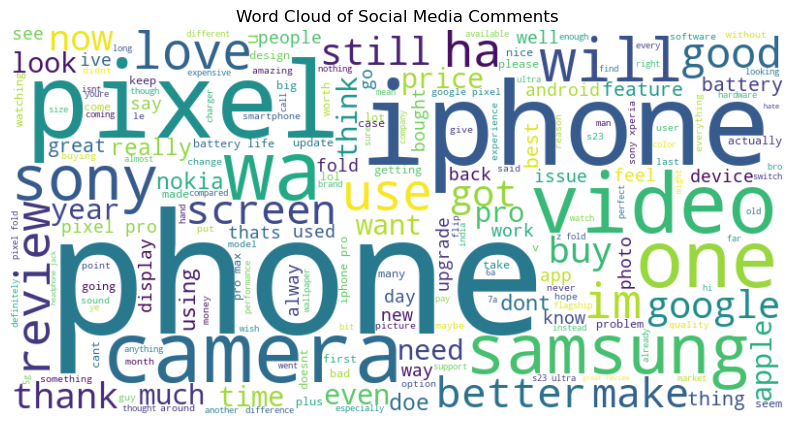

In [22]:
import numpy as np

# Convert float entries to strings in the 'Comment Text' column
data_new['Comment Text'] = data_new['Comment Text'].apply(lambda x: str(x) if not pd.isnull(x) else '')

# Join all comments into a single string
all_comments = ' '.join(data_new['Comment Text'])

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Social Media Comments')
plt.axis('off')
plt.show()

plt.show()

## Word Frequency Analysis

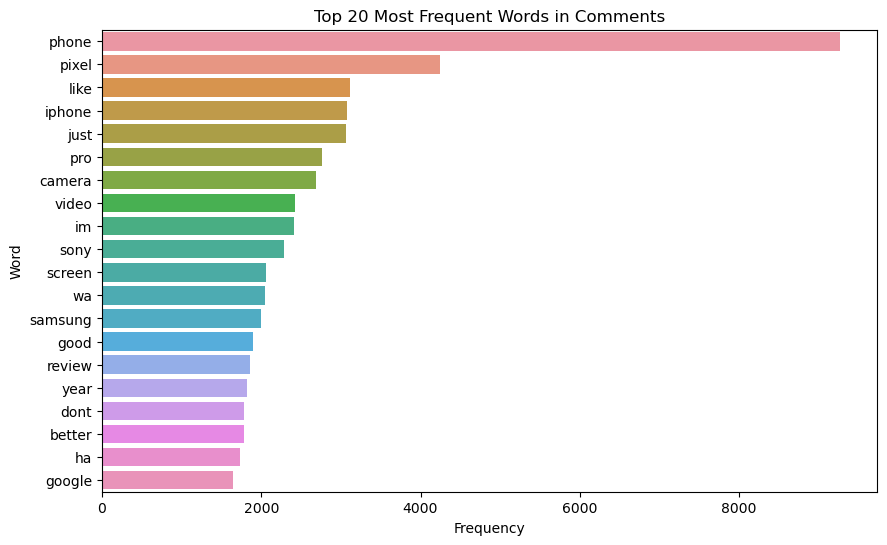

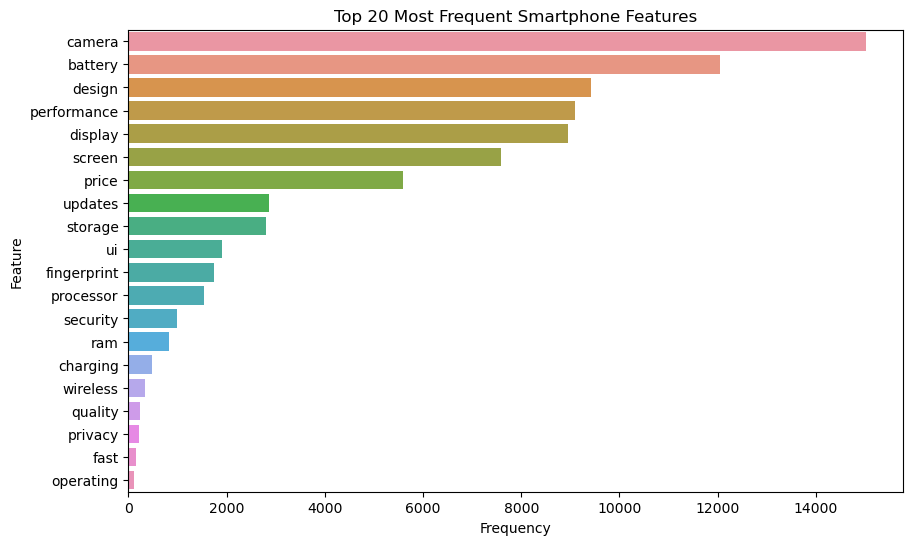

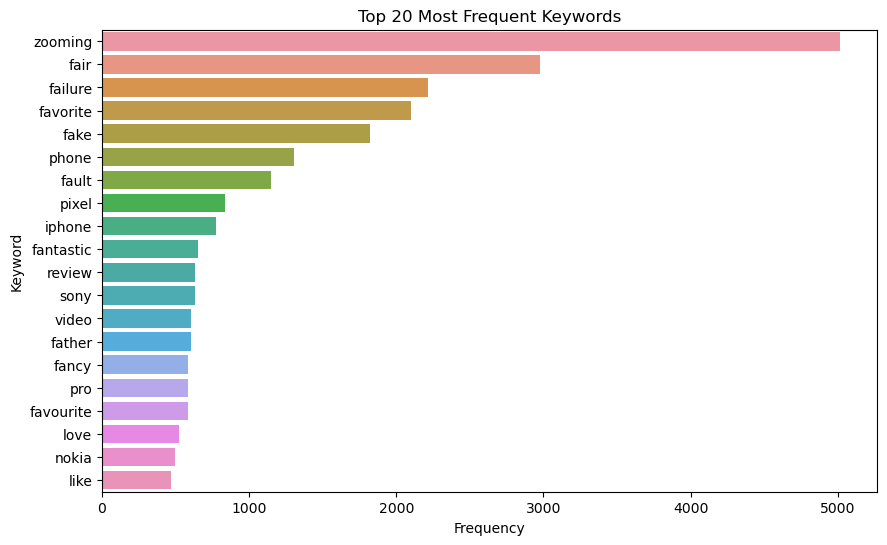

In [23]:
# Word Frequency Analysis
# Tokenize and count words
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer from scikit-learn
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Comment Text'])

# Get word frequencies
word_freq_df = pd.DataFrame({'Word': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Most Frequent Words in Comments')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# Tokenize and count words in the 'Top Smartphone Features' column
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Top Smartphone Features'].apply(lambda x: ' '.join(x)))

# Get word frequencies
word_freq_df = pd.DataFrame({'Feature': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})

# Sort and select the top 20 most frequent features
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Feature', data=word_freq_df)
plt.title('Top 20 Most Frequent Smartphone Features')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.show()

# Tokenize and count words in the 'Top Keywords' column
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Top Keywords'].apply(lambda x: ' '.join(x)))

# Get word frequencies
word_freq_df = pd.DataFrame({'Keyword': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})

# Sort and select the top 20 most frequent keywords
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=word_freq_df)
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from ipywidgets import interact, Dropdown

# Assuming data_new is your DataFrame containing comments and information about brands and products

# Create brand and product dropdown widgets
brand_dropdown = Dropdown(options=data_new['Brand'].unique(), description='Brand:')
product_dropdown = Dropdown(options=[], description='Product:')

# Function to update product dropdown based on selected brand
def update_product_dropdown(brand):
    product_dropdown.options = data_new[data_new['Brand'] == brand]['Product'].unique()

# Function to update the plot based on selected brand, product, and column
def update_word_frequency_plot(brand, product, column):
    # Filter the data based on selected brand and product
    filtered_data = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]
    
    # Tokenize and count words
    word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
    
    if column == 'Comment Text':
        word_frequencies = word_vectorizer.fit_transform(filtered_data[column])
        title = f'Top 20 Most Frequent Words in Comments for {brand}: {product}'
    else:
        word_frequencies = word_vectorizer.fit_transform(filtered_data[column].apply(lambda x: ' '.join(x)))
        title = f'Top 20 Most Frequent Words in {column.capitalize()} for {brand}: {product}'
    
    # Get word frequencies
    word_freq_df = pd.DataFrame({'Word': word_vectorizer.get_feature_names_out(),
                                 'Frequency': word_frequencies.toarray().sum(axis=0)})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

    # Plot word frequencies
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=word_freq_df)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

# Link the brand dropdown to the product dropdown
interact(update_product_dropdown, brand=brand_dropdown)

# Create dropdown for selecting column
column_dropdown = Dropdown(options=['Comment Text', 'Top Smartphone Features', 'Top Keywords'], description='Select Column:')

# Create interactive plot
interact(update_word_frequency_plot, brand=brand_dropdown, product=product_dropdown, column=column_dropdown)


interactive(children=(Dropdown(description='Brand:', options=('iphone', 'Samsung', 'Google', 'Nokia ', 'Sony')…

interactive(children=(Dropdown(description='Brand:', options=('iphone', 'Samsung', 'Google', 'Nokia ', 'Sony')…

<function __main__.update_word_frequency_plot(brand, product, column)>

## N-gram Analysis

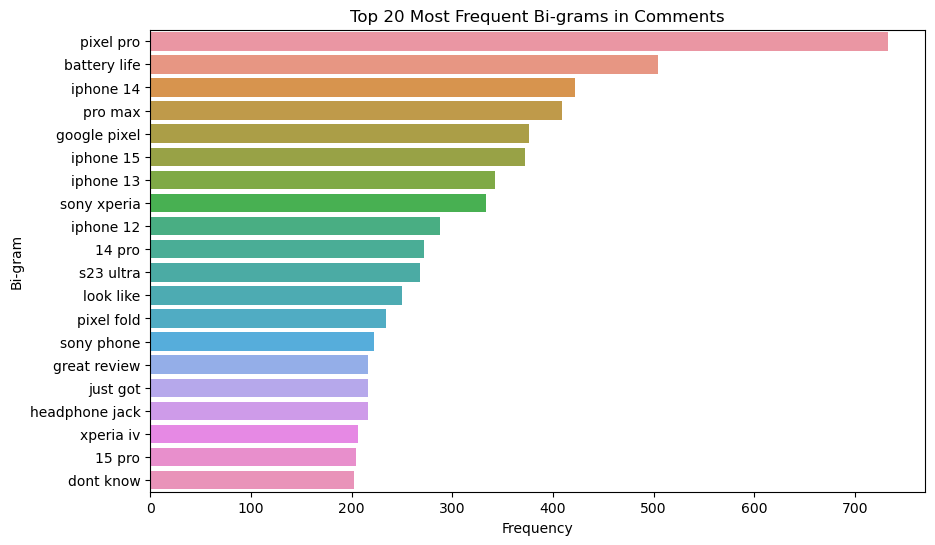

In [25]:
# N-gram Analysis
# Tokenize and count bi-grams
bi_gram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
bi_gram_frequencies = bi_gram_vectorizer.fit_transform(data['Comment Text'])

# Get bi-gram frequencies
bi_gram_freq_df = pd.DataFrame({'Bi-gram': bi_gram_vectorizer.get_feature_names_out(),
                                'Frequency': bi_gram_frequencies.toarray().sum(axis=0)})
bi_gram_freq_df = bi_gram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot bi-gram frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bi-gram', data=bi_gram_freq_df)
plt.title('Top 20 Most Frequent Bi-grams in Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()

## Topic Modeling

In [26]:
from sklearn.decomposition import LatentDirichletAllocation  # Import LatentDirichletAllocation from scikit-learn

# Topic Modeling (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Assuming 5 topics
lda_model.fit(word_frequencies)

# Get the most probable words for each topic
topic_keywords = []
for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:10]  # Top 10 keywords per topic
    topic_keywords.append([word_vectorizer.get_feature_names_out()[i] for i in top_keyword_locs])

# Print the top keywords for each topic
for i, keywords in enumerate(topic_keywords):
    print(f"Topic {i+1}: {', '.join(keywords)}")

Topic 1: phone, failed, sony, doe, xperia, dont, know, buy, want, watch
Topic 2: iphone, pro, s23, im, 15, screen, 14, better, ultra, max
Topic 3: pixel, google, phone, fantastic, nokia, best, fold, apple, fall, pro
Topic 4: zooming, fair, failure, favorite, fake, fault, father, fancy, favourite, phone
Topic 5: wa, battery, day, really, life, video, thanks, charger, fast, charging


The topics extracted from the comments about smartphones using the LDA model are as follows:

Topic 1: Comparative Analysis of Brands

This topic appears to focus on comparisons between different smartphone brands such as Pixel, Samsung, and Google. It includes terms like "s23," "pro," "fold," indicating discussions about specific models or features. Words like "better" and "price" suggest comparisons of features and pricing between different brands or models. Topic 2: iPhone Reviews and Discussions

This topic revolves around discussions related to iPhone models, particularly the Pro versions (e.g., iPhone 14 Pro, iPhone 15 Pro). It includes terms like "review," "video," "just," indicating discussions about reviews and video content related to iPhones. Numbers like "14," "15," "13," and "12" likely refer to different iPhone models. Topic 3: General Smartphone Usage and Preferences

This topic encompasses general discussions about smartphone features and user preferences. It includes terms like "screen," "battery," "camera," "phones," reflecting common features and aspects users consider when evaluating smartphones. Words like "like," "dont," and "better" indicate expressions of preferences and opinions. Topic 4: Sony Xperia Discussions

This topic seems to focus specifically on discussions related to Sony Xperia smartphones. It includes terms like "sony," "xperia," "phones," suggesting discussions about Sony's Xperia series. Words like "love" and "years" may indicate sentiments and longevity of usage regarding Sony Xperia devices. Topic 5: Nokia Smartphone Features

This topic revolves around discussions related to Nokia smartphones, particularly their features and capabilities. It includes terms like "video," "camera," "good," "nice," indicating discussions about the camera quality and overall features of Nokia phones. Words like "jack," "sd," and "card" suggest discussions about hardware features like headphone jacks and SD card support. These topics provide insights into the main themes and discussions present in the comments about smartphones, helping to identify common topics of interest and sentiment among users.

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'Processed Comment' is the column with text data
# Fill missing values with empty strings
data_new['Processed Comment'].fillna('', inplace=True)

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data_new['Processed Comment'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# Visualize topics
def plot_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Get feature names from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Display top words for each topic
n_top_words = 10
plot_top_words(lda_model, feature_names, n_top_words)


Topic #1: battery fold screen phone life charging pixel good like use
Topic #2: screen phone display ha dont like use sony jack sd
Topic #3: iphone pro phone im like 14 year 15 13 android
Topic #4: samsung s23 ultra phone galaxy flip fe fold video wa
Topic #5: pixel pro phone im buy google got 7a better ultra
Topic #6: nokia god man bro x30 wa come wow charger sorry
Topic #7: review video xperia great sony phone thanks good thank iv
Topic #8: phone pixel issue google like dont work problem time ive
Topic #9: phone sony apple year buy love price wa nokia dont
Topic #10: camera photo video mode phone ha lens like picture look


Based on the top words for each topic generated by Latent Dirichlet Allocation (LDA), we can interpret the following themes for each topic:

Topic #1: General Smartphone Use: This topic seems to cover general smartphone usage, including apps, Apple, Google, and usage-related terms like "watch" and "app".

Topic #2: Phone Hardware Features: This topic discusses various hardware features of phones such as headphone jacks, SD cards, charging, storage, and related terms.

Topic #3: Specific Phone Models and Brands: This topic appears to focus on specific phone models and brands like Pixel, Samsung, and Google, including terms like "fold", "fe" (presumably referring to Samsung Galaxy S20 FE), "exynos", and "India".

Topic #4: Expressions and Appreciation: This topic includes expressions like "lol", "like", "god", "thanks", and "mate", possibly indicating sentiments and expressions of appreciation.

Topic #5: Comparison between iPhone Models: This topic seems to discuss comparisons between different iPhone models, including terms like "iphone", "pro", "14", "15", "13", and "12".

Topic #6: Video Reviews: This topic revolves around video reviews, with terms like "video", "review", "great", "thanks", "nice", and "good".

Topic #7: Nokia Phones and Design: This topic seems to focus on Nokia phones, including terms like "nokia", "love", "phone", "good", and "design".

Topic #8: Camera Quality and Features: This topic discusses camera-related aspects of phones, including terms like "camera", "pixel", "photos", "mode", "video", and "quality".

Topic #9: Battery and Screen Quality: This topic discusses battery and screen-related aspects of phones, including terms like "battery", "samsung", "screen", "phones", "good", and "pixel".

Topic #10: Sony Xperia Phones and Updates: This topic revolves around Sony Xperia phones, including terms like "sony", "xperia", "phone", "phones", "years", "updates", "price", and "software".

These topics provide insights into the main themes present in the comments about smartphones. Each topic captures different aspects of smartphone usage, preferences, and opinions expressed by users.

In [28]:
data_new.head(10)

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT
0,iphone,iphone 15,would you rather have a 14 pro or a 15 for that iphone 15 battery test,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[]
1,iphone,iphone 15,a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something thing farther away get smaller slower rate thing closer background object look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'thing', 'position']","['processor', 'camera']",['a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away'],[]
2,iphone,iphone 15,hey chap is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade to the iphone 15 or 15 plus - and how much better are the 15 pro's? here's everything you n

# Sentiment Analysis - VADAR Lexicon 

In [29]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Read the data from the Excel file into a DataFrame
data_new = pd.read_excel('cleaned_smartphone_data.xlsx')

# Function to adjust sentiment polarity based on the sentiment of each sentence and VADER lexicon
def adjust_sentiment_with_sentences(text):
    if pd.isna(text):  # Handle NaN values
        return 0.0
    
    blob = TextBlob(str(text))
    sentence_sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    vader_sentiment = sia.polarity_scores(str(text))['compound']
    avg_sentiment = (sum(sentence_sentiments) / len(sentence_sentiments) + vader_sentiment) / 2
    return avg_sentiment

# Calculate sentiment score for each comment in the DataFrame using sentence-level sentiment analysis and VADER
data_new['Sentiment Score'] = data_new['Comment Text'].apply(adjust_sentiment_with_sentences)

# Assign sentiment labels based on the adjusted sentiment scores
data_new['Sentiment Label'] = data_new['Sentiment Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Save the DataFrame with adjusted sentiments to a new CSV file
data_new.to_csv("smartphone_data_sentiments.csv", index=False)

print("Sentiment analysis completed and adjusted results saved to 'smartphone_data_sentiments.csv'.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis completed and adjusted results saved to 'smartphone_data_sentiments.csv'.


In [30]:
# Load the DataFrame from the newly saved CSV file
new_data = pd.read_csv("smartphone_data_sentiments.csv")  # Update with the new file name


In [31]:


# Check the structure of the loaded DataFrame
print(type(new_data))
print(new_data.head())


<class 'pandas.core.frame.DataFrame'>
    Brand    Product  \
0  iphone  iphone 15   
1  iphone  iphone 15   
2  iphone  iphone 15   
3  iphone  iphone 15   
4  iphone  iphone 15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Comment Text  \
0                                                                                                                                                                                                                                                  

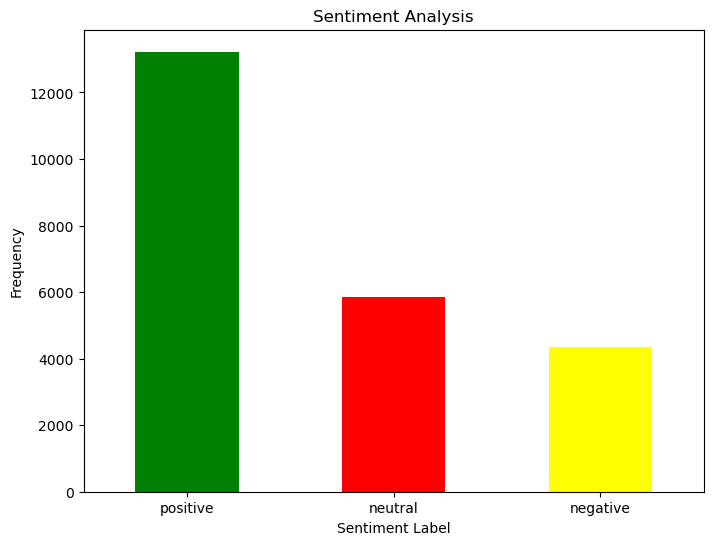

<Figure size 800x600 with 0 Axes>

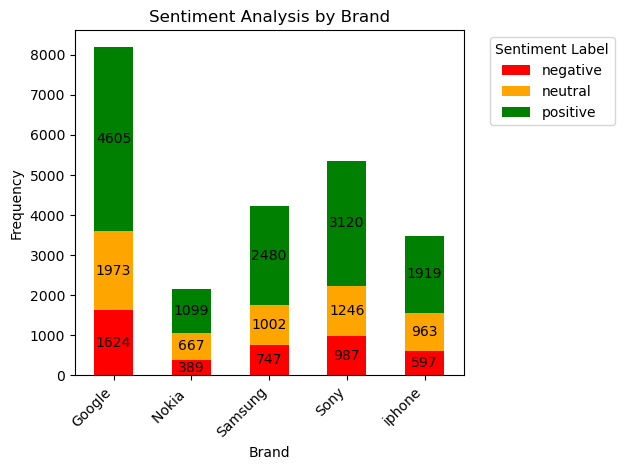

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the newly saved CSV file
new_data = pd.read_csv("smartphone_data_sentiments.csv")

# Check if 'Sentiment Label' column exists in the DataFrame
if 'Sentiment Label' not in new_data.columns:
    print("Error: 'Sentiment Label' column not found. Exiting.")
    exit()

# Aggregate sentiment labels for the entire DataFrame
sentiment_distribution = new_data['Sentiment Label'].value_counts()

# Plotting sentiment distribution for the entire DataFrame
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Extract brand name from DataFrame
if 'Brand' not in new_data.columns:
    print("Error: 'Brand' column not found. Exiting.")
    exit()

# Group by brand and sentiment label, then count occurrences
sentiment_distribution_by_brand = new_data.groupby(['Brand', 'Sentiment Label']).size().unstack(fill_value=0)

# Plotting sentiment analysis by brand
plt.figure(figsize=(8, 6))
ax = sentiment_distribution_by_brand.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'])
plt.title('Sentiment Analysis by Brand')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to the bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height:.0f}', xy=(left + width / 2, bottom + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

In [33]:
new_data.head(20)

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT,Sentiment Score,Sentiment Label
0,iphone,iphone 15,would you rather have a 14 pro or a 15 for that iphone 15 battery test,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[],0.000000,neutral
1,iphone,iphone 15,a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something thing farther away get smaller slower rate thing closer background object look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'thing', 'position']","['processor', 'camera']",['a a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance a your portrait how could there be parallax movement between foreground and background if you didnt change your position right if you move towards something the thing farther away get smaller at a slower rate a the thing closer to you so the background object look smaller on an image in comparison to the foreground object than if youre further away'],[],0.326453,positive
2,iphone,iphone 15,hey chap is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade to the iphone 15 or 15 p

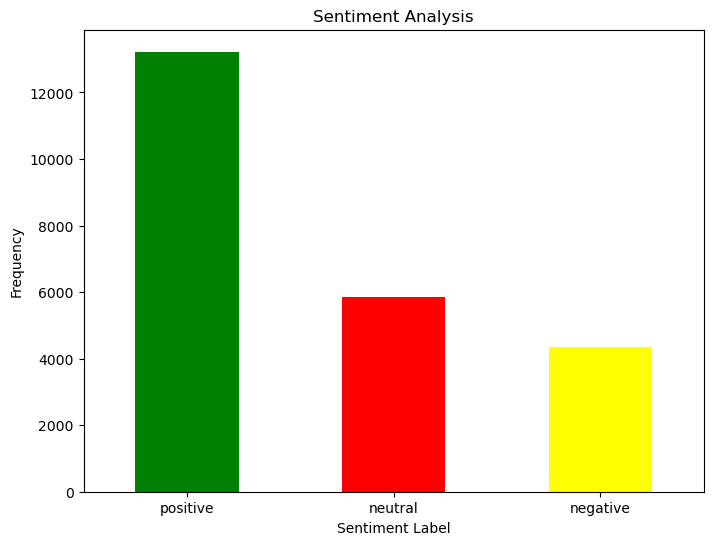

<Figure size 800x600 with 0 Axes>

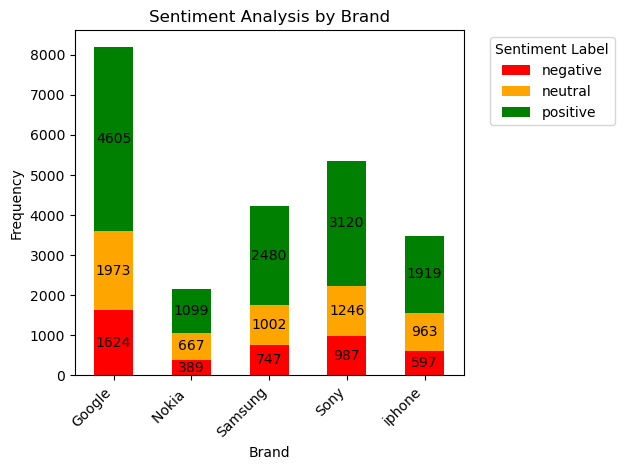

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the newly saved CSV file
new_data = pd.read_csv("smartphone_data_sentiments.csv")

# Check if 'Sentiment Label' column exists in the DataFrame
if 'Sentiment Label' not in new_data.columns:
    print("Error: 'Sentiment Label' column not found. Exiting.")
    exit()

# Aggregate sentiment labels for the entire DataFrame
sentiment_distribution = new_data['Sentiment Label'].value_counts()

# Plotting sentiment distribution for the entire DataFrame
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Extract brand name from DataFrame
if 'Brand' not in new_data.columns:
    print("Error: 'Brand' column not found. Exiting.")
    exit()

# Group by brand and sentiment label, then count occurrences
sentiment_distribution_by_brand = new_data.groupby(['Brand', 'Sentiment Label']).size().unstack(fill_value=0)

# Plotting sentiment analysis by brand
plt.figure(figsize=(8, 6))
ax = sentiment_distribution_by_brand.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'])
plt.title('Sentiment Analysis by Brand')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to the bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height:.0f}', xy=(left + width / 2, bottom + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()



## Interactive wordcould 

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

# Separate positive and negative comments based on sentiment
positive_comments = data_new[data_new['Sentiment Label'] == 'positive']['Processed Comment']
negative_comments = data_new[data_new['Sentiment Label'] == 'negative']['Processed Comment']

# Function to generate word cloud
def generate_wordcloud(comments, title):
    # Convert comments to strings and handle missing values
    comments = comments.astype(str).fillna('')
    
    # Concatenate all comments into a single string
    text = ' '.join(comments)
    
    # Generate the word cloud if there are comments
    if text:
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("No comments found for the selected options. Please select different options.")

# Dropdown options
sentiment_options = ['All', 'positive', 'negative']
brand_options = ['All'] + data_new['Brand'].unique().tolist()
product_options = ['All'] + data_new['Product'].unique().tolist()

# Dropdown widgets
sentiment_dropdown = Dropdown(options=sentiment_options, description='Sentiment:')
brand_dropdown = Dropdown(options=brand_options, description='Brand:')
product_dropdown = Dropdown(options=product_options, description='Product:')

# Function to update word cloud based on dropdown selection
def update_wordcloud(sentiment, brand, product):
    if sentiment == 'All':
        if brand == 'All' and product == 'All':
            comments = data_new['Processed Comment']
        elif brand != 'All' and product == 'All':
            comments = data_new[data_new['Brand'] == brand]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[data_new['Product'] == product]['Processed Comment']
        else:
            comments = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    elif sentiment == 'positive':
        if brand == 'All' and product == 'All':
            comments = positive_comments
        elif brand != 'All' and product == 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Brand'] == brand)]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Product'] == product)]['Processed Comment']
        else:
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & 
                                (data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    else:
        if brand == 'All' and product == 'All':
            comments = negative_comments
        elif brand != 'All' and product == 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Brand'] == brand)]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Product'] == product)]['Processed Comment']
        else:
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & 
                                (data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    
    if sentiment == 'All':
        sentiment_label = ''
    else:
        sentiment_label = sentiment.capitalize()
    
    if brand == 'All':
        brand_label = ''
    else:
        brand_label = brand
    
    if product == 'All':
        product_label = ''
    else:
        product_label = product
    
    title = f'Word Cloud of {sentiment_label} Comments'
    if brand_label and product_label:
        title += f' for {brand_label} {product_label}'
    elif brand_label:
        title += f' for {brand_label}'
    elif product_label:
        title += f' for {product_label}'
    
    # Check if there is any data for the selected brand and product
    if brand != 'All' and product != 'All':
        filtered_data = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]
        if filtered_data.empty:
            print(f"The product '{product}' does not match with the brand '{brand}'. Please select a different combination.")
            return
    
    generate_wordcloud(comments, title)

# Interact function to link dropdowns with update function
interact(update_wordcloud, sentiment=sentiment_dropdown, brand=brand_dropdown, product=product_dropdown)

interactive(children=(Dropdown(description='Sentiment:', options=('All', 'positive', 'negative'), value='All')…

<function __main__.update_wordcloud(sentiment, brand, product)>

## Interactive Sentiment Analysis VIsualisation 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

# Define the function to update the pie chart
def update_pie_chart(brand, product):
    # Filter data based on selected brand and product
    filtered_data = new_data.copy()
    if brand != 'All':
        filtered_data = filtered_data[filtered_data['Brand'] == brand]
    if product != 'All':
        filtered_data = filtered_data[filtered_data['Product'] == product]
    
    # Check if there is any data for the selected brand and product
    if filtered_data.empty:
        print(f"No data available for the selected combination: Brand - {brand}, Product - {product}. Please select a different combination.")
        return
    
    # Group by sentiment label and count occurrences
    sentiment_distribution = filtered_data['Sentiment Label'].value_counts(normalize=True)

    # Define colors based on sentiment
    colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

    # Plotting the pie chart
    plt.figure(figsize=(8, 6))
    sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 7), colors=[colors.get(x, 'gray') for x in sentiment_distribution.index])
    plt.title(f'Sentiment Analysis for {brand} {product}')
    plt.ylabel('')  # Remove the y-label
    plt.show()

# Dropdown options
brand_options = ['All'] + new_data['Brand'].unique().tolist()
product_options = ['All'] + new_data['Product'].unique().tolist()

# Dropdown widgets
brand_dropdown = Dropdown(options=brand_options, description='Brand:')
product_dropdown = Dropdown(options=product_options, description='Product:')

# Interact function to link dropdowns with update function
interact(update_pie_chart, brand=brand_dropdown, product=product_dropdown)

interactive(children=(Dropdown(description='Brand:', options=('All', 'iphone', 'Samsung', 'Google', 'Nokia ', …

<function __main__.update_pie_chart(brand, product)>

#  Machine Learning Classification Models: A Text Classification Approach

In [37]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import pandas as pd
import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("smartphone_data_sentiments.csv")

# Split data into features (X) and target (y)
X = data['Comment Text']
y = data['Sentiment Score']

# Define thresholds
threshold_positive = 0.5
threshold_negative = -0.5
range_neutral = 0.1  # Define a range around zero for neutral sentiment

# Map sentiment scores to discrete categories
def map_sentiment(score):
    if score > threshold_positive:
        return 1  # Positive sentiment
    elif score < threshold_negative:
        return -1  # Negative sentiment
    elif abs(score) <= range_neutral:
        return 0  # Neutral sentiment
    else:
        return None  # Not classified

# Apply mapping to target variable
y_discrete = np.array([map_sentiment(score) for score in y])

# Remove instances where sentiment scores could not be classified
X = X[y_discrete != None]
y_discrete = y_discrete[y_discrete != None]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Convert target variables to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Replace missing values with empty strings (if any)
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Define pipeline components
tfidf_vectorizer = TfidfVectorizer()
bow_vectorizer = CountVectorizer()
svm_classifier = SVC(kernel='linear', C=1.0, class_weight='balanced')
logistic_classifier = LogisticRegression()
naive_bayes_classifier = MultinomialNB()
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=100, tol=None)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create pipelines
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', svm_classifier)
])

logistic_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', logistic_classifier)
])

naive_bayes_pipeline = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', naive_bayes_classifier)
])

sgd_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', sgd_classifier)
])

random_forest_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', random_forest_classifier)
])

decision_tree_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', decision_tree_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', knn_classifier)
])

adaboost_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', adaboost_classifier)
])

# Train and evaluate models using pipelines
pipelines = {
    'SVM': svm_pipeline,
    'Logistic Regression': logistic_pipeline,
    'Naive Bayes': naive_bayes_pipeline,
    'SGD Classifier': sgd_pipeline,
    'Random Forest': random_forest_pipeline,
    'Decision Tree': decision_tree_pipeline,
    'KNN': knn_pipeline,
    'AdaBoost': adaboost_pipeline,
}

results = {}

# Train and save models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Accuracy:", accuracy)
    print(f"\nClassification Report ({name}):\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix ({name}):\n", conf_matrix)
    
    # Save the results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
        'y_test': y_test,
        'y_pred': y_pred
    }
    
    # Save the model
    filename = f"{name.lower().replace(' ', '_')}_text_sentiment.pkl"
    with open(filename, "wb") as pipeline_file:
        joblib.dump(pipeline, pipeline_file)



SVM Accuracy: 0.9490494296577947

Classification Report (SVM):
               precision    recall  f1-score   support

          -1       0.88      0.72      0.79       123
           0       0.96      0.95      0.96      1444
           1       0.95      0.97      0.96      1063

    accuracy                           0.95      2630
   macro avg       0.93      0.88      0.90      2630
weighted avg       0.95      0.95      0.95      2630


Confusion Matrix (SVM):
 [[  88   32    3]
 [  10 1379   55]
 [   2   32 1029]]

Logistic Regression Accuracy: 0.9159695817490494

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

          -1       0.97      0.25      0.40       123
           0       0.90      0.96      0.93      1444
           1       0.93      0.94      0.94      1063

    accuracy                           0.92      2630
   macro avg       0.94      0.72      0.75      2630
weighted avg       0.92      0.92      0.91      2

C:\Users\atiya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



KNN Accuracy: 0.5961977186311787

Classification Report (KNN):
               precision    recall  f1-score   support

          -1       1.00      0.06      0.11       123
           0       0.58      0.99      0.73      1444
           1       0.93      0.12      0.21      1063

    accuracy                           0.60      2630
   macro avg       0.83      0.39      0.35      2630
weighted avg       0.74      0.60      0.49      2630


Confusion Matrix (KNN):
 [[   7  116    0]
 [   0 1434   10]
 [   0  936  127]]

AdaBoost Accuracy: 0.8946768060836502

Classification Report (AdaBoost):
               precision    recall  f1-score   support

          -1       0.82      0.48      0.61       123
           0       0.86      0.96      0.91      1444
           1       0.95      0.85      0.90      1063

    accuracy                           0.89      2630
   macro avg       0.88      0.76      0.80      2630
weighted avg       0.90      0.89      0.89      2630


Confusion Matrix


SVM Accuracy: 0.9490494296577947


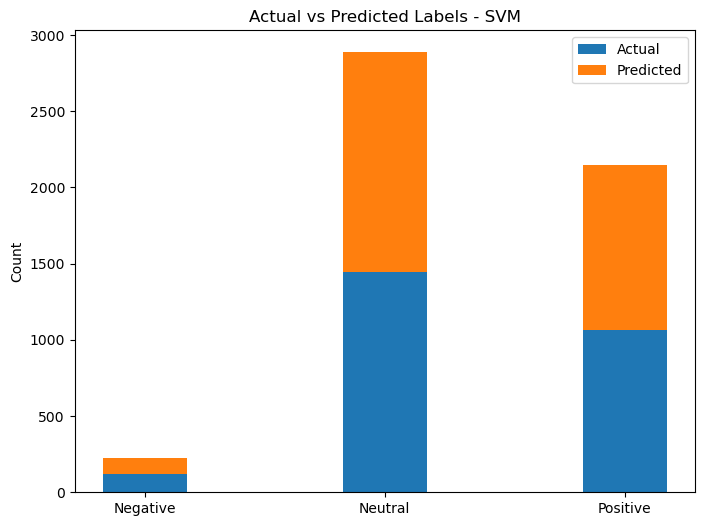


Logistic Regression Accuracy: 0.9159695817490494


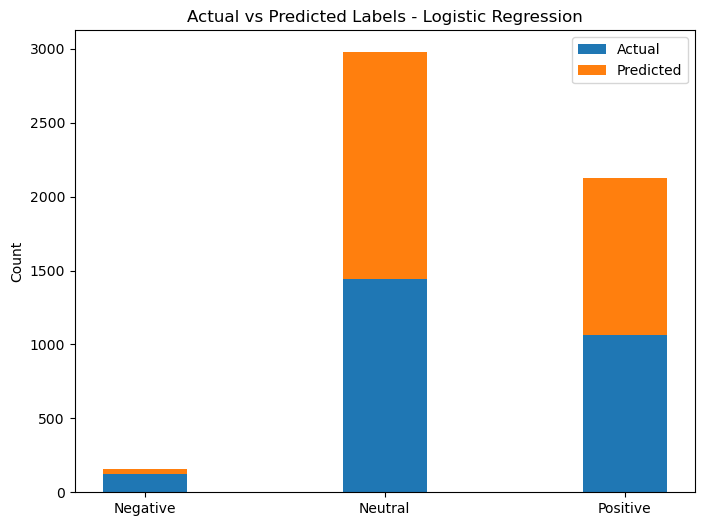


Naive Bayes Accuracy: 0.7866920152091255


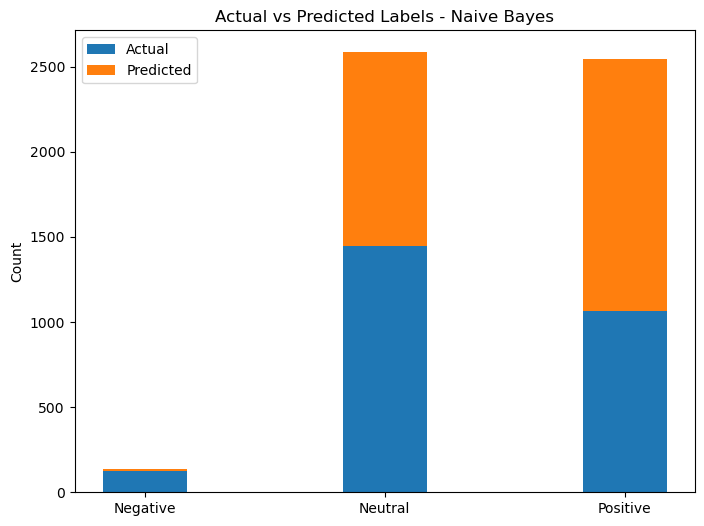


SGD Classifier Accuracy: 0.8859315589353612


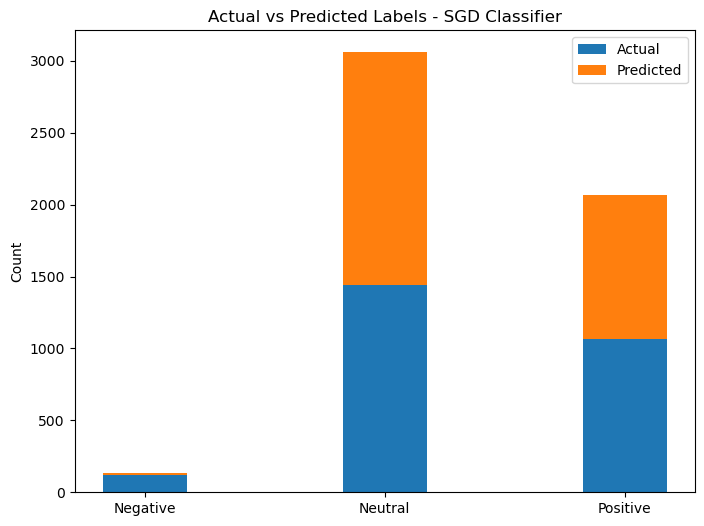


Random Forest Accuracy: 0.9015209125475285


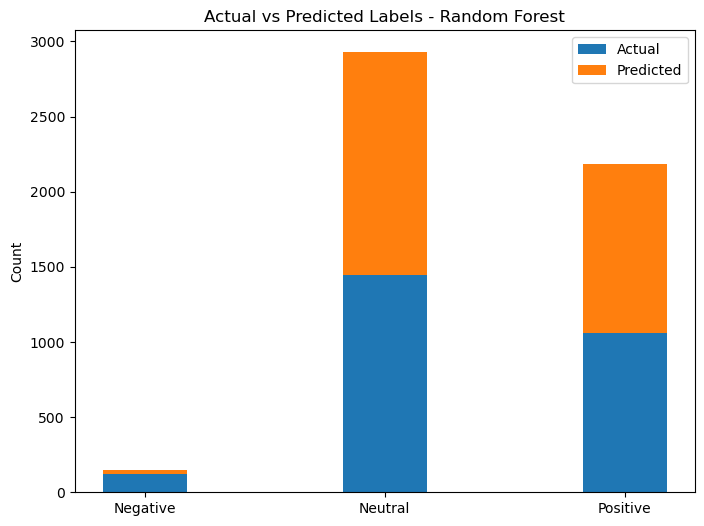


Decision Tree Accuracy: 0.9167300380228137


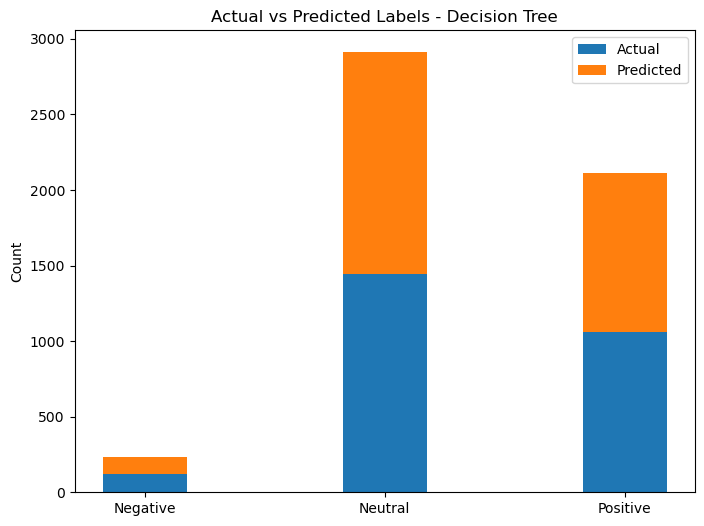


KNN Accuracy: 0.5961977186311787


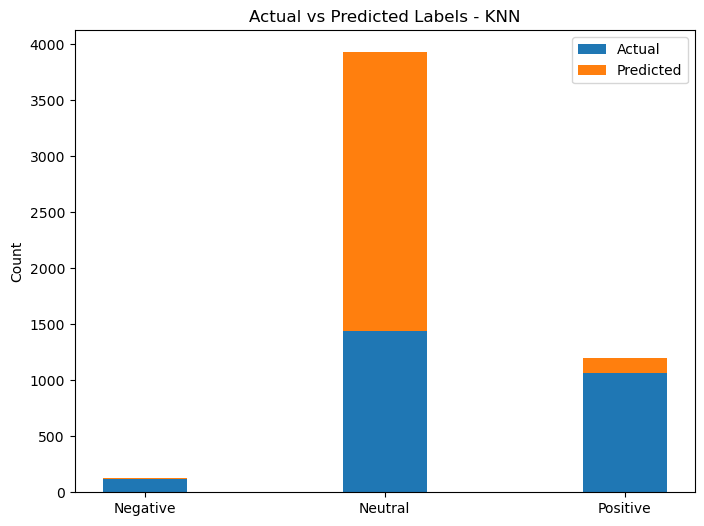


AdaBoost Accuracy: 0.8946768060836502


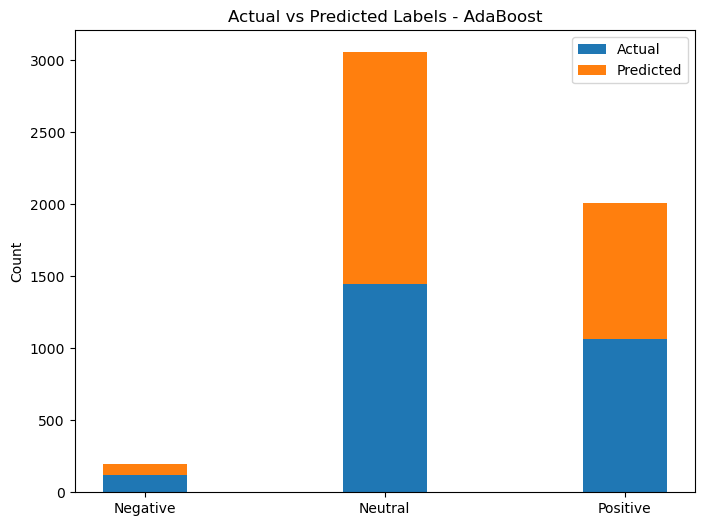

In [38]:
# Visualize the results
for name, result in results.items():
    accuracy = result['accuracy']
    print(f"\n{name} Accuracy:", accuracy)
    
    # Convert numerical labels to sentiment labels
    sentiment_labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
    result['y_test'] = [sentiment_labels[label] for label in result['y_test']]
    result['y_pred'] = [sentiment_labels[label] for label in result['y_pred']]
    
    # Plot stacked bar chart
    labels = sorted(set(result['y_test']))
    actual_counts = [result['y_test'].count(label) for label in labels]
    predicted_counts = [result['y_pred'].count(label) for label in labels]
    
    width = 0.35
    ind = np.arange(len(labels))
    
    plt.figure(figsize=(8, 6))
    p1 = plt.bar(ind, actual_counts, width)
    p2 = plt.bar(ind, predicted_counts, width, bottom=actual_counts)
    
    plt.ylabel('Count')
    plt.title(f'Actual vs Predicted Labels - {name}')
    plt.xticks(ind, labels)
    plt.legend((p1[0], p2[0]), ('Actual', 'Predicted'))
    plt.show()


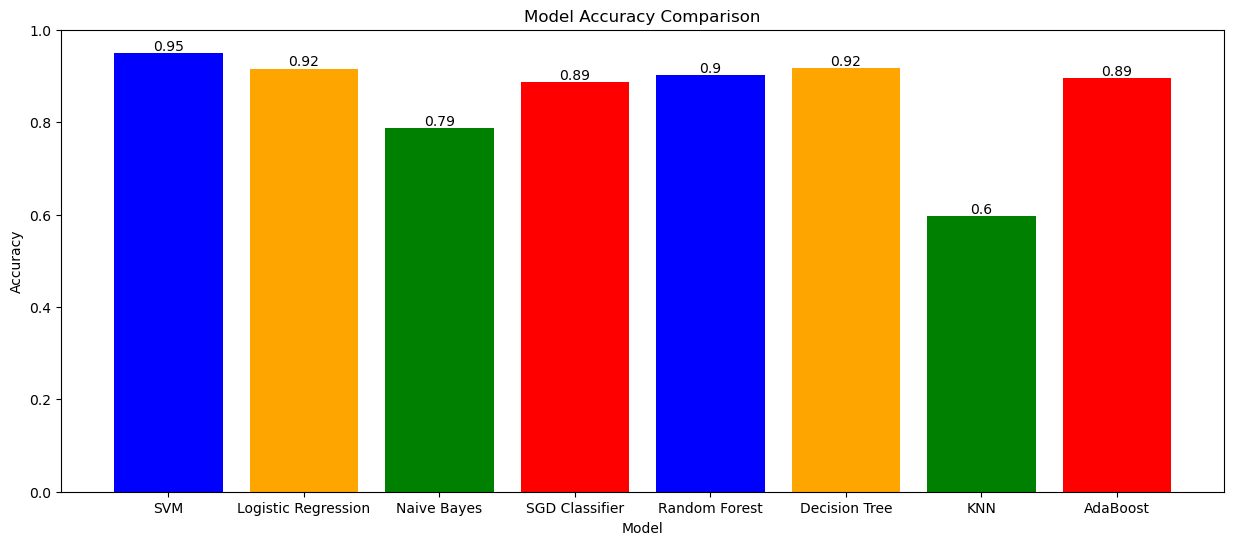

In [39]:
# Plot grouped bar chart for accuracy comparison
labels = list(results.keys())
accuracy_values = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(15, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'])

# Add labels to each bar
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(acc, 2),
             ha='center', va='bottom', color='black')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()